Name: Thang Bui Doan \
Email: thang.buidoan@telecom-paris.fr \
Project MDI220 Statistics

In [1]:
import pandas as pd
from scipy.stats import probplot
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Exercise 1.1: 

In [2]:
df = pd.read_csv('C_id_35_NuclearPowerAccidents2016.csv', keep_default_na=False, na_values = [''])

In [3]:
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
#Filter out accidents happen before 28/3/1979
df = df.loc[df['Date']<pd.to_datetime('1979-03-28'), ['Cost (millions 2013US$)']]

In [5]:
#Drop null values
data = df.dropna().iloc[:,0].to_numpy()

In [6]:
data.shape

(55,)

In [7]:
data

array([8.1890e+03, 4.4000e+03, 3.5000e+03, 2.9000e+03, 2.5000e+03,
       1.9645e+03, 1.9000e+03, 1.7334e+03, 1.5000e+03, 1.3300e+03,
       1.3000e+03, 1.1000e+03, 1.1000e+03, 9.9000e+02, 8.0000e+02,
       7.9390e+02, 7.8840e+02, 5.4140e+02, 5.1150e+02, 4.2520e+02,
       2.7710e+02, 1.8000e+02, 1.5000e+02, 1.0000e+02, 1.0000e+02,
       9.9500e+01, 9.8000e+01, 8.9900e+01, 8.7700e+01, 8.4500e+01,
       7.7000e+01, 6.0100e+01, 5.2400e+01, 3.8000e+01, 3.7500e+01,
       2.5700e+01, 2.5700e+01, 1.7100e+01, 1.6100e+01, 1.5000e+01,
       1.3900e+01, 1.1800e+01, 1.1400e+01, 6.1000e+00, 4.4000e+00,
       1.2000e+00, 1.1000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00])

## Normal distribution

# Exercise 1.2:

The probability density function: $f(x) = \frac{1}{\sigma\sqrt{2\pi}} * e^{\frac{-(x-\mu)^2}{2\sigma^2}}$

The cumulative distribute function: $F(x_i) = \int_{-\infty}^{x_i} f(x) d(x)$

Set $t = \frac{x-\mu}{\sigma} \Rightarrow f(x) = f(t)*\frac{1}{\sigma} = -\frac{1}{\sigma\sqrt{2\pi}} * e^{\frac{-t^2}{2}}
\Rightarrow$ $t$ follows distribution $\mathcal{N}=(0,1)$

$t = \frac{x-\mu}{\sigma} \Rightarrow t_i = \frac{x_i-\mu}{\sigma}$ &emsp; $dt = \frac{dx}{\sigma} $

$\Rightarrow
F(x_i) = \int_{-\infty}^{t_i} f(t) dt = F(t_i) = p$

$F_\theta^{-1}(p) = x_i; F_{(0,1)}^{-1}(p) = t_i \Rightarrow F_\theta^{-1}(p)=\sigma*F_{(0,1)}^{-1}(p)+\mu
$

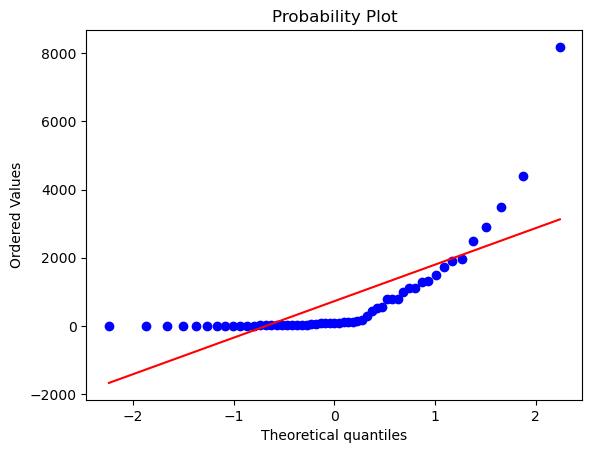

In [8]:
fig = probplot(data, plot=plt, dist='norm')

# Exercise 1.3:

The probability density function: $f(x) = \theta e^{-\theta x}$

The cumulative distribute function: $F(x_i) = \int_{-\infty}^{x_i} f(x) d(x)$

Set $t = \theta x \Rightarrow f(x) = \theta * f(t) = -\theta * e^{-t} \Rightarrow t$ follows distribution exponential distribution with parameter 1

$t = \theta x \Rightarrow$ $ t_i = \theta {x_i}$ &emsp; $dt = \theta dx$
$\Rightarrow F(x_i) = \int_{-\infty}^{t_i} f(t) dt = F(t_i) = p$
$F_\theta^{-1}(p) = x_i; F_{1}^{-1}(p) = t_i$ 
$\Rightarrow F_\theta^{-1}(p)=\frac{1}{\theta}F_{1}^{-1}(p)$


## Exponential distribution

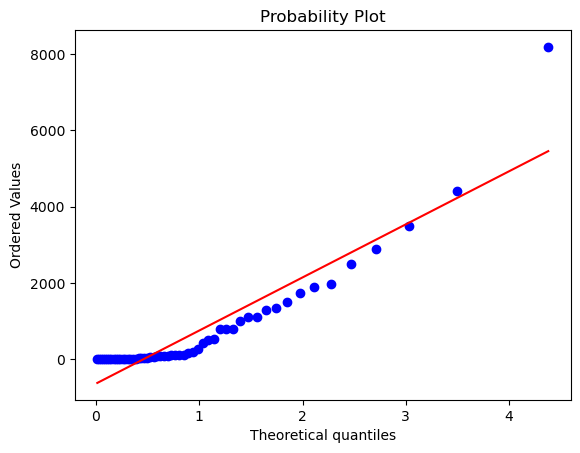

In [9]:
fig = probplot(data, plot=plt, dist='expon')

# Exercise 1.4: The data is closer to the exponential distribution

When plot with the Q-Q plot of exponential distribution, the data point is closer to the straight line than when ploting on the Q-Q plot of normal distribution.

# Exercise 2.1:

Assume all observations are i.i.d 

$\Rightarrow p_{\theta}(x) = \prod p_{\theta}(x_i) = \prod \theta e^{-\theta x_i}$

$\Rightarrow \hat{\theta} = argmax(log(p_{\theta}(x))) = argmax(n*log\theta - \theta *\sum x_i)$

$\frac{\partial{log(p_{\theta}(x))}}{\partial{x}} = \frac{n}{\theta} - \sum x_i = 0 \; \Leftrightarrow \theta = \frac{n}{\sum x_i}$ &emsp; with n=55 is the number of observations

In [10]:
theta_estimated = 1/np.average(data)
theta_estimated

0.0013767725947156965

# Exercise 2.2:

C:\Users\thang\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\thang\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\thang\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

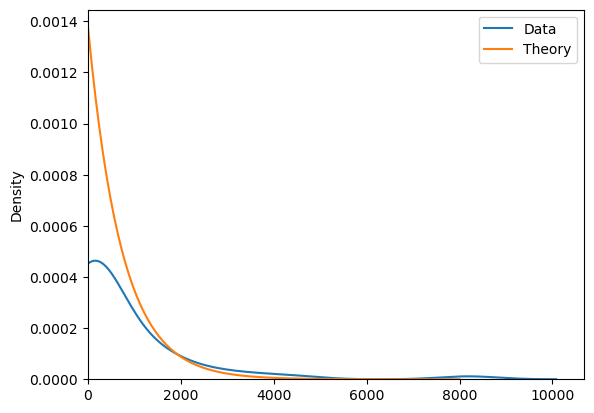

In [11]:
sns.kdeplot(data, label='Data')
plt.xlim(0, None)
x = np.arange(0, 8001, 80)
y = theta_estimated*np.exp(-theta_estimated*x)
sns.lineplot(x=x, y=y, label='Theory')

In [12]:
theta_estimated*np.exp(-theta_estimated)

0.0013748783961776592

# Exercise 2.3:
$\hat{g}(x) = \frac{\sum x_i}{N}$ \
Because x follows exponential distribution \
$ \Rightarrow E(\hat{g}(x)) = \frac{1}{\theta} \Rightarrow b(g, \hat{g}) = 0$

Consider all the observations are idependent identically distributed:
$var(\hat{g}(x)) = \frac{1}{N^2} \sum var(x_i) = \frac{1}{N} * \frac{1}{\theta^2}$ \
$\Rightarrow R(g, \hat{g}) = b(g, \hat{g})^2 + var(\hat{g}(x)) = \frac{1}{N\theta^2}$

$p_{\theta}(x) = \prod\theta e^{-\theta x_i} \Rightarrow \frac{\partial logp_{\theta}(x)}{\partial\theta} = \frac{n}{\theta} - \sum{x_i}$\
$\Rightarrow I(\theta) = E(-\frac{\partial^2 logp_{\theta}(x)}{\partial\theta^2}) = \frac{N}{\theta^2}$

$R(g, \hat{g}) \geq \frac{1}{I(\theta)} \Rightarrow $ The estimator is efficient 



# Exercise 2.3
$$
p_{\theta}(x) = \prod\theta e^{-\theta x_i} \Rightarrow \frac{\partial logp_{\theta}(x)}{\partial\theta} = \frac{n}{\theta} - \sum{x_i}=0
\Rightarrow \theta=\frac{n}{\sum{x_i}}
\newline
\Rightarrow E_{\theta}(\hat{g}(x))=g(x)\Rightarrow\; Estimator\;is\;unbiased
\newline
\Rightarrow I(\theta) = -E_{\theta} (\frac{\partial^2 log\;p_{\theta}(x)}{\partial \theta ^2}(X))=\frac{n}{\theta^2}
\newline
\newline
var(x_1) = var(x_2) = ... = var(x_n) = \frac{1}{\theta^2}\Rightarrow
R(g,\hat g) = var(\hat g(x)) = \frac{1}{n\theta^2} \Rightarrow The\;estimator\;is\;efficient
$$

# Exercise 2.4

In [13]:
g_hat = np.average(data)
g_hat

726.3363636363637

# Exercise 2.5:

$\hat{g}_\eta(\theta) = \eta \hat{g}(\theta)$\
$\Rightarrow R(g, \hat{g}_\eta) = b(g, \hat{g}\eta)^2 + var(\hat{g}_\eta) = (\frac{1 - \eta}{\theta})^2 + \frac{\eta}{N\theta^2}$

For  $R(g, \hat{g}_\eta) \lt R(g, \hat{g}): (\frac{1 - \eta}{\theta})^2 + \frac{\eta}{N\theta^2} \lt \frac{1}{N\theta^2}$ \
$(1-\eta)^2 - \frac{1-\eta}{N} \lt 0$ \
$(1 - \eta)(1 - \eta - \frac1N) \lt 0$ \
$ 1-\eta \gt 0$ and $1- \eta - \frac1N \gt 0$ \
$1 - \frac1N \lt \eta \lt 1$ 


By multiply the estimator with coefficient $\eta$ satisfies the above condition, we get an biased estimator, but with less risk. \
$\hat{g}$ is an unbiased estimator, but in term of quadratic risk, it is not optimum. 

# Exercise 2.6:

Cumulative distribution function of exponential distribution
$F(x_i) = \int_{0}^{x_i} f(x) d(x) = 1 - e^{-\theta x_i}$

Median of the distribution would satisfy: $F(x_i) = \frac 12$ or $x_i = \frac{log(2)}{\theta}$

So the unbiased estimator of the median would be: $\hat{g}_{\eta} = \frac{log(2) \sum x_i}{N}$ 

In [14]:
estimated_median = np.log(2)*np.average(data)
estimated_median

503.4580025927086

In [15]:
np.median(data)

89.9

The estimated median is far from the actual value, the possible reason for this may be the distribution of data is actually not exponential, only approximately and the number of samples is small.

# Exercise 2.7:
We have $\eta = log(2) \lt 1 - \frac 1N$ with $N = 55$. Quadratic risk of $\hat{g}_\eta$ is larger than that of $\hat{g}$.

In term of quadratic risk, $\hat{g}_\eta$ is better when: $1 - \frac 1N \lt log(2) \lt 1$ \
The number of samples satisfies: $N \lt \frac{1}{1 - log(2)}$ 


In [16]:
1/(1-np.log(2))

3.258891353270929

# Exercise 3.1:
The expected value of exponential distribution is: $\frac{1}{\theta}$

$ H_0 = \{ \theta \leq \frac{1}{10^9}\} $

$ H_1 = \{ \theta > \frac{1}{10^9}\}$

# Exercise 3.2:

$\forall \theta'>\theta \gt 0: \frac{p_{\theta '}(x)}{p_{\theta}(x)} = \frac{\theta'}{\theta}*e^{-(\theta'-\theta)x}\$  is a decreasing function.

The UMP test: $\delta(x) = 1_{x<c}$

# Exercise 3.3:

$f(x) = \prod \theta e^{-\theta x_i} = \theta^n e^{-\theta S} $ with S is the sum of all observations.

S follows Gamma distribution with $\alpha = n$ and $\beta = \theta$

We have test $\delta(S) = 1_{S<c}$ with $c = Q(\alpha)$ is the quantile level $\alpha=0.05$ of Gamma distriubtion, parameters $\alpha = n$, and $\beta=\theta$

$f(x) = \theta e^{-\theta x}$
$\Rightarrow F(x_i) = \int_0 ^{x_i} f(x)dx = 1 - e^{-\theta x_i}$

When $F(x_i) = \alpha \Rightarrow x_i = c = \frac{-log(1 - \alpha)}{\theta}$
<!-- $\alpha = Sup_{\theta \leq 10^{-9}}(\delta(x) = 1) \Rightarrow $ \
 -->

In [29]:
c = -np.log(1-0.05)/10**(-9)
c

51293294.38755058

In [19]:
np.mean(data)

726.3363636363637

The mean of cost is smaller than c, thus we reject the null hypothesis

# Exercise 3.4:

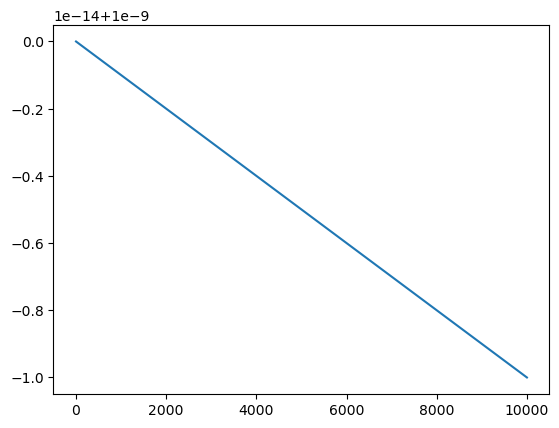

In [28]:
x = np.arange(0, 10000, 0.2)
y = (10**-9) * np.exp(-(10**-9)*x)
plt.plot(x, y)

# Exercise 3.5:

